## Multi-layer neural networks, Sequential and Module

we will talk about the first deep learning model, multi-layer neural network.

### Multi-layer neural 
In the previous linear regression, our formula is $y=wx+b$, in Logistic regression our formula is $y = Si g m o i d(wx+b)$, in fact they all can be regarded as single-layer neural networks, where sigmoid is called the Activation function. Than we will detail the activation function and why we use the activation function. Let's start with understanding Neural Networks.  

### Understanding the Neural Network

The neural network is inspired by the neuron system of the human brain. Below we put a comparison of neurons and neural networks of the human brain (from cs231n).

![](https://i.imgur.com/4jTry3f.jpg)

On the left is a picture of a neuron that receives input through synapses and then transmits it to subsequent neurons via neural activation . This is compared to the neural network on the right, first accepting the data input, then calculating the result, then passing the activation function , and then passing it to the second layer of neurons.

So both the logistic regression model and the linear regression model mentioned above can be regarded as a single-layer neural network, while the logistic regression uses the activation function sigmoid.

The activation functions used by the neural network are non-linear. Each activation function inputs a value and then performs a specific mathematical operation to get a result. Here are a few examples.

#### Sigmoid activation function

![](https://i.imgur.com/dE6zcFG.png)

#### Tanh activation function

![](https://i.imgur.com/iFsa149.png)

#### ReLU activation function
![](https://i.imgur.com/GN2heOS.jpg)

The ReLU is the most used activation function in the world right now.Since, it is used in almost all the convolutional neural networks or deep learning.

 

### Neural Networks

A neural network is a group of neural cells that are piled together to form a layer of neural networks. Then multiple layers are stacked together to form a deep neural network. We can show a two-layer neural network and a three-layer neural network through the following diagram.

![](https://i.imgur.com/DtBlqOm.jpg)
It can be seen that the structure of the neural network is actually very simple, mainly composed of an input layer, a hidden layer, and an output layer. The input layer needs to be determined according to the number of features, and the output layer is determined according to the solved problem, then the number of network layers of the hidden layer is determined. And the number of neurons in each layer is an adjustable parameter, and the different layers and the parameters of each layer have a great influence on the model.

Let's take a deep look what each neuron is doing:

![](https://i.imgur.com/UucQTQ0.jpg)

The neural network forward propagation is also very simple, that is, it can be done layer by layer. You can take a look at the following example.

![](https://i.imgur.com/tOk0qBh.gif)

You can see some neuron from a layer lightsup, and each neuron has some weight associated with them.

### why use acitvation function:

It's an function used to transform the input into an output signal. Each neuron has an activation function which species the output of a neuron to a given input. When one uses the neural network to learn, the updating of the contributions depends on the steepness (slope) of the activation function. Activation functions for the hidden units are needed to introduce non-linearity into the network.

## Example

In [1]:
import torch
import numpy as np
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_decision_boundary(model, x, y):
    # Set min and max values and give it some padding
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

This time we still deal with a two-class problem, but it is more complicated than the previous logistic regression.

In [3]:
np.random.seed(1)
m = 400 # number of samples
N = int(m/2) # number of points in each case
D = 2 # Dimension
x = np.zeros((m, D))
y = np.zeros((m, 1), dtype='uint8') # label vector, 0 for red, 1 for blue
a = 4

for j in range(2):
    ix = range(N*j,N*(j+1))
    t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
    r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
    x[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

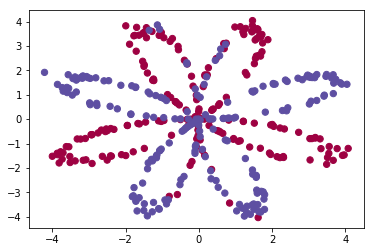

In [4]:
plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

We can first try to solve this problem with logistic regression.

In [5]:
x = torch.from_numpy(x).float()
y = torch.from_numpy(y).float()

In [6]:
w = nn.Parameter(torch.randn(2, 1))
b = nn.Parameter(torch.zeros(1))

optimizer = torch.optim.SGD([w, b], 1e-1)

def logistic_regression(x):
    return torch.mm(x, w) + b

criterion = nn.BCEWithLogitsLoss()

In [7]:
for e in range(100):
    out = logistic_regression(Variable(x))
    loss = criterion(out, Variable(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (e + 1) % 20 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.data[0]))

epoch: 20, loss: 0.8461627960205078
epoch: 40, loss: 0.676689863204956
epoch: 60, loss: 0.6732770800590515
epoch: 80, loss: 0.6731698513031006
epoch: 100, loss: 0.6731544733047485


C:\Users\Codeseeder\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  


In [10]:
def plot_logistic(x):
    x = Variable(torch.from_numpy(x).float())
    out = torch.sigmoid(logistic_regression(x))
    out = (out > 0.5) * 1
    return out.data.numpy()

Text(0.5,1,'logistic regression')

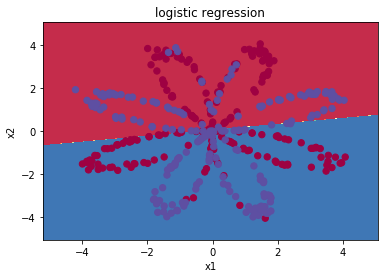

In [11]:
plot_decision_boundary(lambda x: plot_logistic(x), x.numpy(), y.numpy())
plt.title('logistic regression')

As you can see, logistic regression does not distinguish this complex data set very well. If you remember the previous content, you know that logistic regression is a linear classifier. At this time, our neural network will debut!

In [13]:
# Define the parameters of the TWO layer neural network
w1 = nn.Parameter(torch.randn(2, 4) * 0.01) # Hidden layer neuron no. 2 
b1 = nn.Parameter(torch.zeros(4))

w2 = nn.Parameter(torch.randn(4, 1) * 0.01)
b2 = nn.Parameter(torch.zeros(1))

# Define model 
def two_network(x):
    x1 = torch.mm(x, w1) + b1
    x1 = torch.tanh(x1) # Use the Tanh activation function
    x2 = torch.mm(x1, w2) + b2
    return x2

optimizer = torch.optim.SGD([w1, w2, b1, b2], 1.)

criterion = nn.BCEWithLogitsLoss()

In [14]:
# Train for 10000 times
for e in range(10000):
    out = two_network(Variable(x))
    loss = criterion(out, Variable(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (e + 1) % 1000 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.data[0]))

C:\Users\Codeseeder\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  if __name__ == '__main__':


epoch: 1000, loss: 0.2918160557746887
epoch: 2000, loss: 0.27881497144699097
epoch: 3000, loss: 0.2709607779979706
epoch: 4000, loss: 0.2657695710659027
epoch: 5000, loss: 0.26216965913772583
epoch: 6000, loss: 0.2595402002334595
epoch: 7000, loss: 0.257539838552475
epoch: 8000, loss: 0.2559678256511688
epoch: 9000, loss: 0.25469863414764404
epoch: 10000, loss: 0.25364866852760315


In [18]:
def plot_network(x):
    x = Variable(torch.from_numpy(x).float())
    x1 = torch.mm(x, w1) + b1
    x1 = torch.tanh(x1)
    x2 = torch.mm(x1, w2) + b2
    out = torch.sigmoid(x2)
    out = (out > 0.5) * 1
    return out.data.numpy()

Text(0.5,1,'2 layer network')

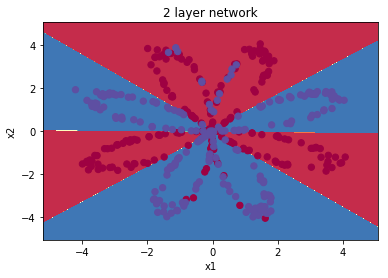

In [19]:
plot_decision_boundary(lambda x: plot_network(x), x.numpy(), y.numpy())
plt.title('2 layer network')

It can be seen that the neural network can classify this complex data very well. Compared with the previous logistic regression, the neural network becomes a nonlinear classifier because of the existence of the activation function, so the boundary of the neural network classification is more complicated.

## Sequential and Module

We talked about data processing, model building, loss function design, etc., but so far we are not ready to build a complete machine learning system, a complete machine learning system requires us to constantly read and write models. In real-world applications, we generally train the model locally and then save the model. Then we deploy the model to different places for application, so in this lesson we will teach you how to save the PyTorch model.

First we will talk about the modules in PyTorch, Sequential and Module.

For the previous linear regression model, Logistic regression model, and neural network, we defined the required parameters at the time of construction. This is feasible for smaller models, but for large models, such as the 100-layer neural network, it is very cumbersome to manually define the parameters at this time, so PyTorch provides two modules to help us build the model. Sequential, one is Module.

Sequential allows us to build serialized modules, and Module is a more flexible way of defining models. We use Sequential and Module to define the neural network above.

In [20]:
# Sequential
seq_net = nn.Sequential(
    nn.Linear(2, 4), # Linear Layer in Pytorch wx+b
    nn.Tanh(),
    nn.Linear(4, 1)
)

In [21]:
# Sequence layer can access each layer through index

seq_net[0] # First Layer

Linear(in_features=2, out_features=4, bias=True)

In [22]:
# Print weight of First Layer
w0 = seq_net[0].weight
print(w0)

Parameter containing:
tensor([[-0.0803,  0.1925],
        [ 0.4394,  0.6405],
        [ 0.6730, -0.4591],
        [-0.3099,  0.1402]], requires_grad=True)


In [23]:
#Parameter get the parameters of the model
param = seq_net.parameters()

# Define optimizer
optim = torch.optim.SGD(param, 1.)

In [24]:
#Train
for e in range(10000):
    out = seq_net(Variable(x))
    loss = criterion(out, Variable(y))
    optim.zero_grad()
    loss.backward()
    optim.step()
    if (e + 1) % 1000 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.data[0]))

C:\Users\Codeseeder\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  if __name__ == '__main__':


epoch: 1000, loss: 0.2698602080345154
epoch: 2000, loss: 0.24330928921699524
epoch: 3000, loss: 0.23379988968372345
epoch: 4000, loss: 0.22823667526245117
epoch: 5000, loss: 0.22439531981945038
epoch: 6000, loss: 0.22151966392993927
epoch: 7000, loss: 0.21925823390483856
epoch: 8000, loss: 0.21742790937423706
epoch: 9000, loss: 0.21592018008232117
epoch: 10000, loss: 0.21466146409511566


It can be seen that training 10,000 times of loss is lower than before, because PyTorch's own module is more stable than we wrote, and there are some initialization problems in it. For parameter initialization, we will talk about it in the following lessons.

In [25]:
def plot_seq(x):
    out = torch.sigmoid(seq_net(Variable(torch.from_numpy(x).float()))).data.numpy()
    out = (out > 0.5) * 1
    return out

Text(0.5,1,'sequential')

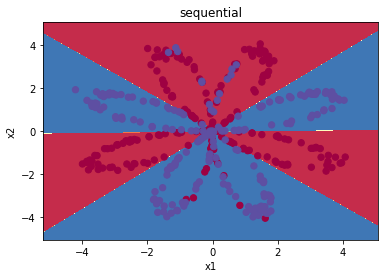

In [26]:
plot_decision_boundary(lambda x: plot_seq(x), x.numpy(), y.numpy())
plt.title('sequential')

Finally, let's talk about how to save the model. There are two ways to save the model in PyTorch. One is to save the model structure and parameters together, and the other is to save the parameters only. We will introduce them one by one.

In [27]:
# Save paramters and model together
torch.save(seq_net, 'save_seq_net.pth')

The above is the way to save the model, $torch.save$ there are two parameters, the first is the model to be saved, the second parameter is the saved path, the way to read the model is also very simple

In [28]:
# Load the saved model
seq_net1 = torch.load('save_seq_net.pth')

In [29]:
seq_net1

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Tanh()
  (2): Linear(in_features=4, out_features=1, bias=True)
)

In [30]:
print(seq_net1[0].weight)

Parameter containing:
tensor([[-8.6289,  9.5641],
        [10.6127, 12.4969],
        [10.7260, -3.2467],
        [-0.1707,  9.3139]], requires_grad=True)


We can see that we re-read the model and named it seq_net1 and printed the parameters of the first layer.

Let's take a look at the second way to save the model, just save the parameters without saving the model structure.

In [31]:
# save model parameters
torch.save(seq_net.state_dict(), 'save_seq_net_params.pth')

In the above way, we save the parameters of the model. If we want to re-read the parameters of the model, we first need to redefine the model and then read the parameters again.

In [32]:
seq_net2 = nn.Sequential(
    nn.Linear(2, 4),
    nn.Tanh(),
    nn.Linear(4, 1)
)

seq_net2.load_state_dict(torch.load('save_seq_net_params.pth'))

In [33]:
seq_net2

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Tanh()
  (2): Linear(in_features=4, out_features=1, bias=True)
)

In [34]:
print(seq_net2[0].weight)

Parameter containing:
tensor([[-8.6289,  9.5641],
        [10.6127, 12.4969],
        [10.7260, -3.2467],
        [-0.1707,  9.3139]], requires_grad=True)


In this way, we also re-read the same model, print the comparison of the parameters of the first layer, and found that it is the same as the previous method.

There are two ways to save and read the model, we recommend using the second because the second is more portable

Let's define this model with Module. Here is the template for using Module.

```
class network_name(nn.Module):
    def __init__(self, define_parameters):
        super(network_name, self).__init__()
        self.layer1 = nn.Linear(num_input, num_hidden)
        self.layer2 = nn.Sequential(...)
        ...
        
        Define the network layer you need to use.
        
    def forward(self, x): # define forward propagation
        x1 = self.layer1(x)
        x2 = self.layer2(x)
        x = x1 + x2
        ...
        return x
```

Below we follow the template to implement the above neural network.

In [35]:
class module_net(nn.Module):
    def __init__(self, num_input, num_hidden, num_output):
        super(module_net, self).__init__()
        self.layer1 = nn.Linear(num_input, num_hidden)
        
        self.layer2 = nn.Tanh()
        
        self.layer3 = nn.Linear(num_hidden, num_output)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

In [36]:
my_net = module_net(2, 4, 1)

In [38]:
# to access the layer we can directly pass a name
# Level one
l1 = my_net.layer1
print(l1)

Linear(in_features=2, out_features=4, bias=True)


In [39]:
# Print weights of the first layer
print(l1.weight)

Parameter containing:
tensor([[-0.6695,  0.4783],
        [-0.0858,  0.2975],
        [ 0.6960, -0.0514],
        [-0.2003,  0.6615]], requires_grad=True)


In [41]:
# Define optimizer
optim = torch.optim.SGD(my_net.parameters(), 1.)

In [43]:
# Train
for e in range(10000):
    out = my_net(Variable(x))
    loss = criterion(out, Variable(y))
    optim.zero_grad()
    loss.backward()
    optim.step()
    if (e + 1) % 1000 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.data[0]))

C:\Users\Codeseeder\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  if __name__ == '__main__':


epoch: 1000, loss: 0.2972879707813263
epoch: 2000, loss: 0.2785627841949463
epoch: 3000, loss: 0.2434636503458023
epoch: 4000, loss: 0.23215040564537048
epoch: 5000, loss: 0.22669847309589386
epoch: 6000, loss: 0.22316589951515198
epoch: 7000, loss: 0.22056825459003448
epoch: 8000, loss: 0.2185225933790207
epoch: 9000, loss: 0.2168513536453247
epoch: 10000, loss: 0.21546171605587006


In [45]:
# Save the model
torch.save(my_net.state_dict(), 'module_net.pth')

You can see that we got the same result, and it is more convenient to define the model using Sequential and Module.

In this section we still use the gradient descent method to optimize the parameters. In the neural network, this optimization method has a special name, backpropagation algorithm. In the next lesson, we will talk about what is the back propagation algorithm.

### Small exercise: 
change the number of hidden layer neurons in the network, or try to define a 5 layer or even deeper model, increase the number of training, change the learning rate, and see what happens.